<a href="https://colab.research.google.com/github/Dat28060596/Text-to-Image/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Runtime->run all

Adjust the parameters num_inference_steps and guidance_scale in the generate_image() function to improve the quality of the generated images

Get api key through link:
 https://makersuite.google.com/app/apikey?fbclid=IwAR14YI3F_7EMa8xdK02boxckZ1Kzb9nMk5DwvSiRDwH1Gw7Snc_VLuW7_6U

In [ ]:

import google.generativeai as genai
GOOGLE_API_KEY = input("Enter the api key")
genai.configure(api_key=GOOGLE_API_KEY)

Enter the api keyAIzaSyB85hub2a-aB5AVMPfyr8oCEBJzITHKDKE


In [ ]:

%pip install --quiet --upgrade diffusers accelerate mediapy

import mediapy as media, random, sys, torch
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

pipe = pipe.to("cuda")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter what you want to draw (type 'exit' to quit): rose


  0%|          | 0/20 [00:00<?, ?it/s]

""

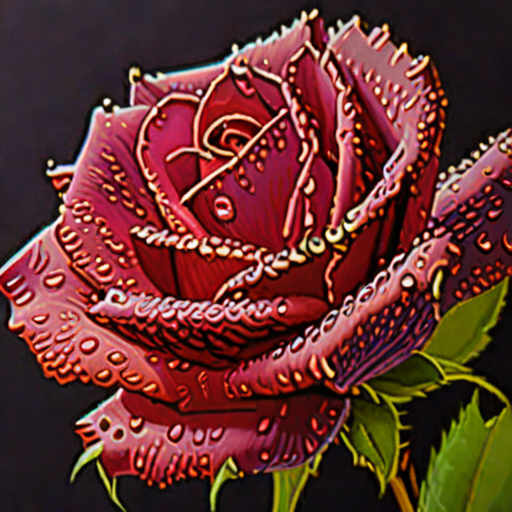

Enter what you want to draw (type 'exit' to quit): exit


In [ ]:
model = genai.GenerativeModel('gemini-pro')

def generate_image(text, num_inference_steps=20, guidance_scale=0.9):
    prompt = "You are creating a prompt for Stable Diffusion to generate an image. Please generate a text prompt for %s. Only respond with the prompt itself, but embellish it as needed but keep it under 80 tokens." % text
    response = model.generate_content(prompt)

    prompt = response.text
    seed = random.randint(0, sys.maxsize)

    images = pipe(
        prompt=prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=torch.Generator("cuda").manual_seed(seed),
    ).images

    return images

while True:
    text = input("Enter what you want to draw (type 'exit' to quit): ")
    if text.lower() == 'exit':
        break
    images = generate_image(text)
    media.show_images(images)